## Importing the Data

We will start by importing the data and taking a look at the first few rows.

In [78]:

# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
# test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
# test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
# test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
# test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
# print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
# print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (8349, 26)
Loaded Validation features dimensions: (2087, 26)

Loaded Training labels dimensions: (8349, 1)
Loaded Validation labels dimensions: (2087, 1)

First few rows of loaded training features:
   Warengruppe_2  Warengruppe_3  Warengruppe_4  Warengruppe_5  Warengruppe_6  \
0              0              0              0              0              0   
1              0              1              0              0              0   
2              1              0              0              0              0   
3              0              0              0              0              0   
4              0              1              0              0              0   

   Temperatur_Cluster_2  Temperatur_Cluster_3  Jahreszeit_2  Jahreszeit_3  \
0                     0                     1             1             0   
1                     0                     1             0             0   
2                     0                     0       

In [79]:
# Convert DataFrames to numpy arrays
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column

print("Training Features Array:")
print(training_features_array[:5])

Training Features Array:
[[ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   1.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  9.6900e+01  1.3000e+01
   2.2500e+01  0.0000e+00]
 [ 0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  9.8200e+01  1.1000e+01
   2.0825e+01  0.0000e+00]
 [ 1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  9.5800e+01  1.1000e+01
   8.1250e+00  3.3000e+01]
 [ 0.0

## Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Ursprüngliche Modellarchitektur
model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [81]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=15,
                    validation_data=(validation_features, validation_labels))

Epoch 1/15


261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 59292.8516 - val_loss: 35079.3047
Epoch 2/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26089.0273 - val_loss: 8510.0801
Epoch 3/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9313.1494 - val_loss: 5904.3984
Epoch 4/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7787.8291 - val_loss: 5043.5391
Epoch 5/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6219.4487 - val_loss: 4786.4893
Epoch 6/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6205.1104 - val_loss: 4710.7446
Epoch 7/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6138.9277 - val_loss: 4501.1704
Epoch 8/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5670.7109 - val_loss: 4369.5894
Epoch 9/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6049.2349 - val_loss: 4281.1157
Epoch 10/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6600.1636 - val_loss: 4170.4131
Epoch 11/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6132.7959 - val_loss: 4029

## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [82]:
model.save("python_model.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

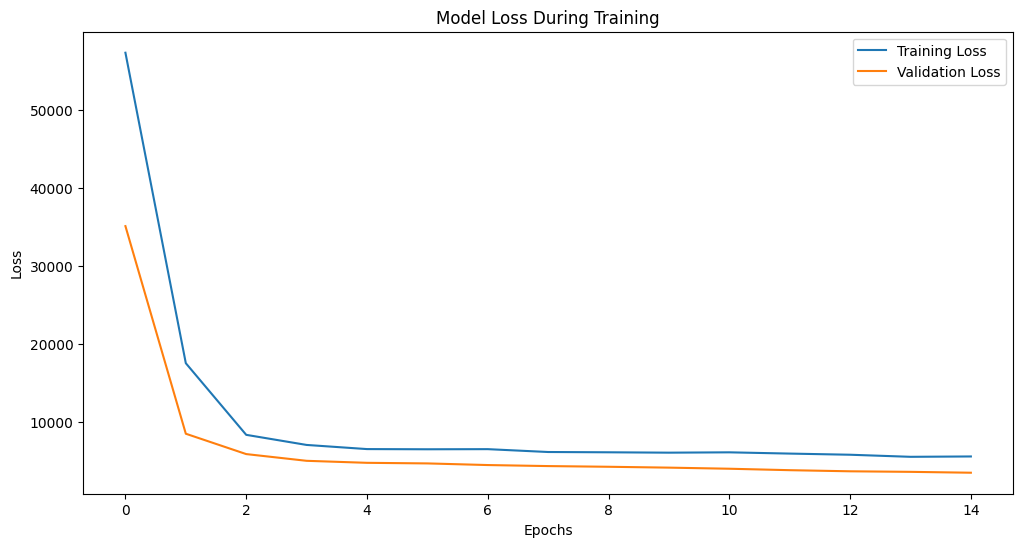

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [84]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
MAPE on the Training Data: 27.18%
MAPE on the Validation Data: 27.50%


## Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


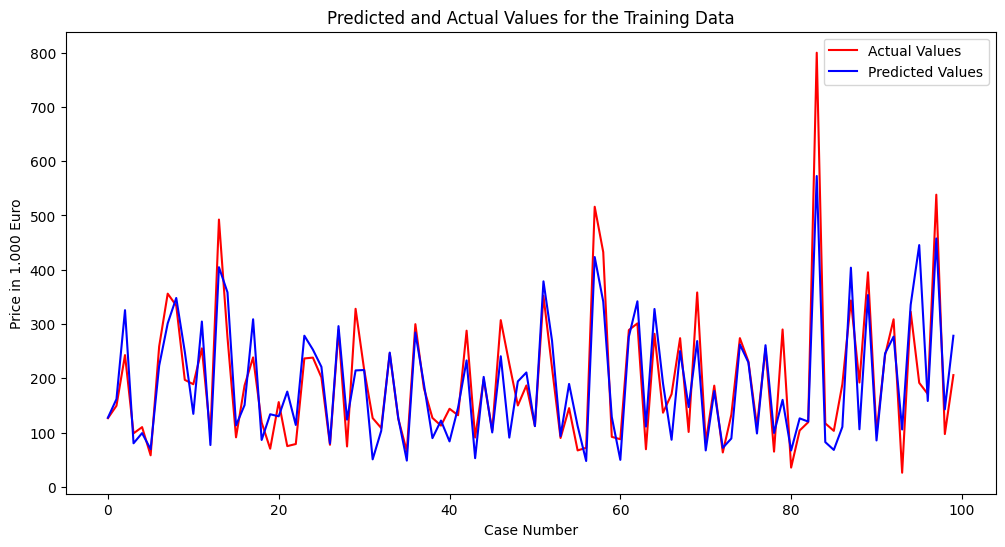

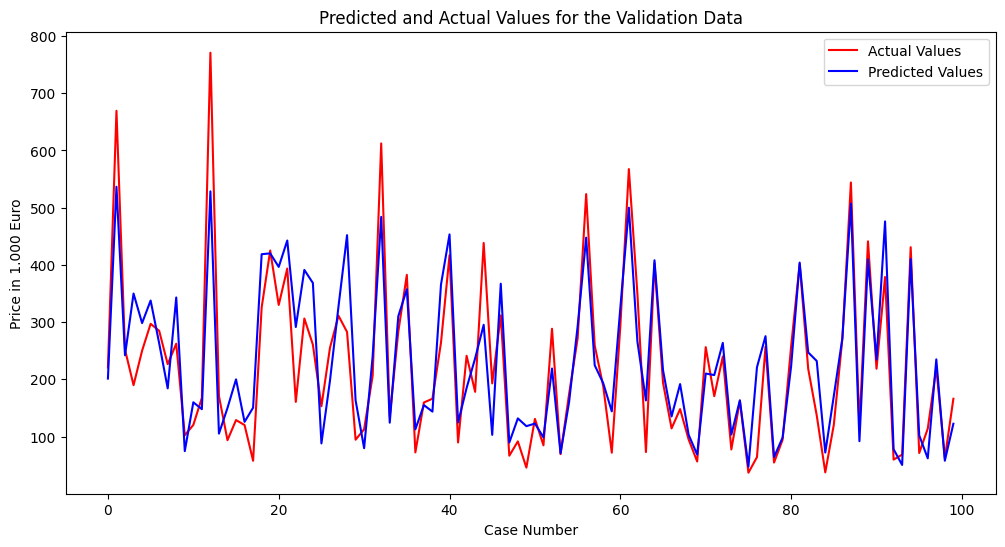

In [85]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 Euro')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')



In [86]:
# Berechnung der Vorhersagen - läuft nicht korrekt!

kaggle_daten = pd.read_csv('data_export_for_kaggle_v2_KNN.csv', usecols=['id', 'Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6', 'Temperatur_Cluster_2', 'Temperatur_Cluster_3', 'Jahreszeit_2', 'Jahreszeit_3', 'Jahreszeit_4', 'FerienSH', 'Feiertag', 'Weihnachtsmarkt', 'Wochenende'])

features = ['Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6', 'Temperatur_Cluster_2', 'Temperatur_Cluster_3', 'Jahreszeit_2', 'Jahreszeit_3', 'Jahreszeit_4', 'FerienSH', 'Feiertag', 'Weihnachtsmarkt', 'Wochenende']

vorhersage_daten = kaggle_daten[features]
vorhersagen = model.predict(vorhersage_daten)
kaggle_daten = kaggle_daten.assign(Umsatz=vorhersagen)

# Wählen Sie nur die Spalten 'id' und 'Umsatz' aus
export_daten = kaggle_daten[['id', 'Umsatz']]

# Exportieren Sie den DataFrame in eine CSV-Datei
export_daten.to_csv('kaggle_vorhersagen_nn_KNN.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data_export_for_kaggle_v2_KNN.csv'